# K Nearest Neighbor by Naveen Kumar K

In [ ]:
# K Nearest Neighbor in Python

In [108]:
#Load the necessary python libraries for using in the machine learning process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [109]:
#Load the dataset from your local system
df = pd.read_csv('C:/Users/BestintownACER1/Desktop/ML_P/K_Nearest_Neighbor/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
# Check the shape of the data frame to know the number of rows and columns 
# The first 8 are the variables or the features and the last is the target variable
df.shape

(768, 9)

In [111]:
# Let's create numpy arrays for features and target
# Here we take the first 8 columns as the variables or the predictors 
X = df.drop('Outcome',axis=1).values

# And the last column as the predicted column or the target
y = df['Outcome'].values

In [112]:
#importing train_test_split - This is used to split the data in to training and testing data set

from sklearn.model_selection import train_test_split

In [113]:
# Here I am splitting the data in to 70% ( Training - for building the model ) & ( 30% - for Testing the model ) 
# However this percentage is not mandatory to maintain & depends on the users preserence and you can do Trial & error in this 
# to get a good ourcome ( Ps. There are some standards to split you can learn same from internet )

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4, stratify=y)

In [119]:
#import KNeighborsClassifier from the sklearn library ( make sure you have already "pip install"ed the sklearn library before this )
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
# Created a list of numbers from 1 to 24 to check the accuracies of different values of k

# We can chand the list of the numbers here and we can generate the model for different values of K and by plotting the graph of 
# Train & test accuracy we will be able to understand which value of K is better to be selected for a good accuracy

neighbors = np.arange(1,25)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Writing a for loop to loop with all the values of k from 1 to 24 and generate the results for our comparison. 

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

In [120]:
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

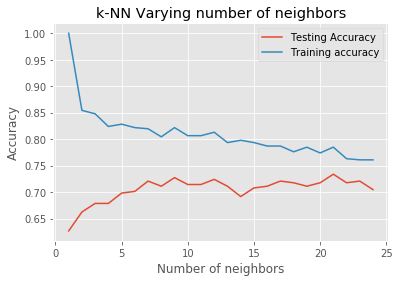

In [121]:
# I am genrating a plot to compare the accuracy of the model in training and testing phase with differnt values of K

# This will easily help us to select the best vaule of K whoch will give good accuracy ( Please keep in mind dont fall for 
# small imporvement in accuracy by selecting a very large value of K which may make the model complex & Overfitting )

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [122]:
#Setup a knn classifier with k neighbors with K = 9 - Visibly 9 gives better accuracy in the graph. 
# Let us use this a benchmark to imporve the model
knn = KNeighborsClassifier(n_neighbors=9)

In [123]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [124]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7272727272727273

In [125]:
#import confusion_matrix
# Confursion matrix is a simple table which is widely used to classify the correct and misclassifications in any classification models
# We can get True Positives & Negatives AND False Positives and Negatives form this matrix ( We can also find the accuracty, 
# sensitivity, specificity, precision & recall easily from the matrix )

from sklearn.metrics import confusion_matrix

In [126]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [127]:
confusion_matrix(y_test,y_pred)

array([[159,  42],
       [ 42,  65]], dtype=int64)

In [128]:
# Confusion matrix can also be obtained using the crosstab function from the pandas library 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,159,42,201
1,42,65,107
All,201,107,308


In [129]:
# Classification Report gives you a summary of precision, recall & other metrics which will be useful in model evaluaiton
#import classification_report
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       201
           1       0.61      0.61      0.61       107

   micro avg       0.73      0.73      0.73       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.73      0.73      0.73       308



In [131]:
# ROC Curve 

# The ROC ( Reciver Operator Charecterstic ) Curve is plot of the True Positive Rate ( TPR ) vs the False positive rate ( FPR ) for
# different possible cutpoints of the test

# It tells us the tradeoff between the Sensitivity and the Specificity - More Sensitivity => Less Specificity 
# More Horizontal and Vertical the curve is the more accurate the model is 
# More the curve comes near to the bottom left and top right diagonal - Less accurate the model is 
# The area under the ROC curve will give the accuracy of the model

y_pred_proba = knn.predict_proba(X_test)[:,1]

In [132]:
from sklearn.metrics import roc_curve

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

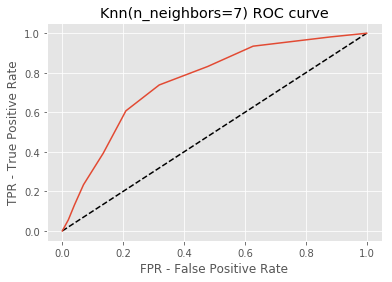

In [134]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [135]:
#Area under ROC curve - This metric will give the accuracy of the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7572185799972102

# Cross Validation & Hyper parameter tuning

In [ ]:
# Cross Validation 

# The performace of our current model entirely depends on the way we have split our data and this will not tell us 
# about the ability of the model to predict the output in case of a new data or genralise the solution

# Using cross validation we split our data in to Training ( to Build the model ) and Testing data ( to Validate the model )

# In K fold cross validaiton - We split the data in to K equal parts ( Yes the same K what you are thinking ) and in this K samples we use 
# K-1 Samples (for Training) & the balance 1 sample for validating the model

# This complete process is repated K types where every sample becomes a validation dataset once

# The result of the same can be combined or Averages to get a better estimation - This will makesure the model is ran on the complete data
# atlest once 

In [ ]:
# Selecting the value of K ( Just by seeing the graph as 9 ) is a very naive way of selectng the K

# This can be done is a more effective way by 
# -- Trying different Hyperparameter values 
# -- Fitting them seperately to the model 
# -- Checking the performance of each of the Hyperparameter 
# -- Selecting the best performing one 
# -- Using crossvalidation everytime we do this process so that model is run on the complete data

In [ ]:
# Python provides a good option to do Hyperpaprameter tuning bu using " GridSearch Cross Validation "

In [137]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Perofoming a Grid Search Cross validation for K's between 1 to 99 and lets see the result 

In [138]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,100)}

In [139]:
# This the part where the Grid Serch performs the duty of creating the corss validations & performing the KNN model and measuring
# the best group for our use.

# We are using grid from 1 to 99 and 10 fold cross validation 

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
# After all the permutaitons and combinations of testing the machines shares the best possible model will have accuracy of 75%

knn_cv.best_score_

0.7552083333333334

In [141]:
# And the value of K to acheive a good accuracy is 7 

knn_cv.best_params_

{'n_neighbors': 17}

In [ ]:
# We can also find the best value of K using the error rate
# Let us plot the error values from 1 to 100 values of K and see how it perfoms and also we cna verify if the 
# Grid Search CV is giving us a good estimation or not

In [142]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 100):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [ ]:
# Comparing the graph and selecting the right value of K now depends on how much accuracty we need and also how much 
# Complexity of the model we can accomodate 

Text(0,0.5,'Mean Error')

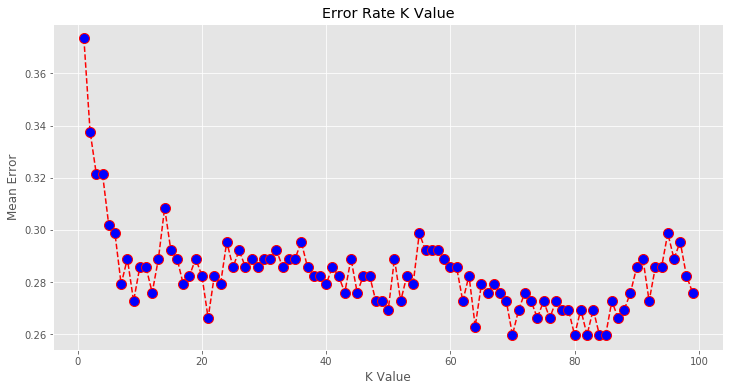

In [143]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [ ]:
# We can see from the graph that , 9, around 14, 17 and 21 seems to be a good options for the values of K.
# More tuning and trials can be done to finalize the value of K for deployment

In [ ]:
# Thank you 
# You can reachout to me at 
# https://www.linkedin.com/in/naveenkreddy/